In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import os
from pathlib import Path
import glob
import sys
sys.path.append(os.path.abspath("../.."))
from src.models import Encoder, Decoder, Discriminator, mlp_classifier
import cv2

# Load Data and Models

In [3]:
x_train = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/augmented_x_train.npy')
y_train = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/augmented_y_train.npy')
x_val = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/x_val.npy')
y_val = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/y_val.npy')
x_test = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/x_test.npy')
y_test = np.load('/Users/inescunha/Documents/GitHub/AI4CellFate/data/final_split/y_test.npy')

config = {
    'batch_size': 30,
    'epochs': 50,
    'learning_rate': 0.001,
    'seed': 42,
    'latent_dim': 2,
    'GaussianNoise_std': 0.003,
}

img_shape = (x_train.shape[1], x_train.shape[2], 1)
encoder = Encoder(img_shape=img_shape, latent_dim=config['latent_dim'], num_classes=2, gaussian_noise_std=config['GaussianNoise_std']).model
decoder = Decoder(latent_dim=config['latent_dim'], img_shape=img_shape, gaussian_noise_std=config['GaussianNoise_std']).model

encoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/s1_ep35_lr5_la1_seed42_ldim2_s2_lr6_la4_lc1_lcon8/models/encoder.weights.h5") ###TODO: change to the model path
decoder.load_weights("/Users/inescunha/Documents/GitHub/AI4CellFate/results/s1_ep35_lr5_la1_seed42_ldim2_s2_lr6_la4_lc1_lcon8/models/decoder.weights.h5") ###TODO: change to the model path

# Visual Interpretations

(2, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


(2, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
(2, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(2, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(2, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


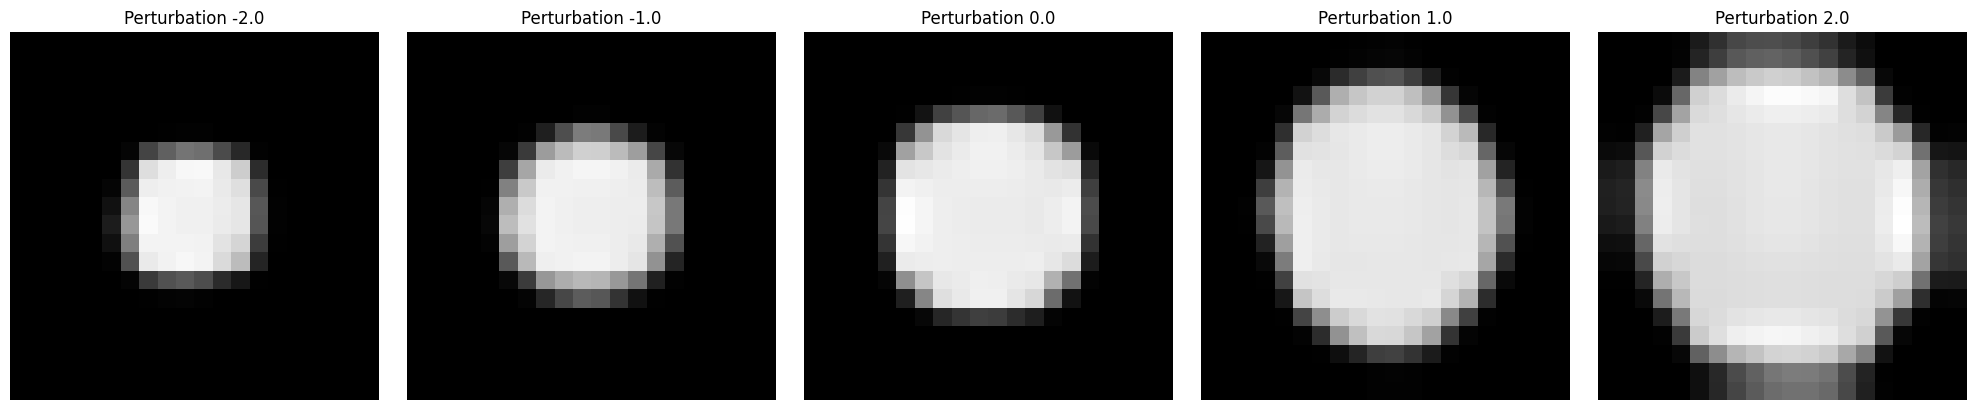

In [10]:
baseline_latent_vector = np.zeros((2, 2), dtype=np.float32)  # Start with a neutral latent vector

# Choose the feature to perturb (e.g., feature 0)
feature_index = 0

# Perturbation range
perturbations = np.linspace(-2, 2, 5) # feature index 0

# Store the perturbed reconstructions
perturbed_reconstructions = []

for value in perturbations:
    # Create a copy of the baseline latent vector
    perturbed_vector = baseline_latent_vector.copy()
    print(perturbed_vector.shape)
    # Modify the selected feature
    perturbed_vector[0, feature_index] = value
    
    # Decode the perturbed vector to generate a synthetic image
    synthetic_image = decoder.predict(perturbed_vector)  # Assuming 'decoder' is your trained decoder model
    
    # Store the result
    perturbed_reconstructions.append(synthetic_image[0])  # Assuming decoder outputs (batch_size, height, width, channels)

# Convert list to numpy array for easier handling
perturbed_reconstructions = np.array(perturbed_reconstructions)

# Plot the results
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
vmin = perturbed_reconstructions.min()
vmax = perturbed_reconstructions.max()

for i in range(5):
    im = axs[i].imshow(perturbed_reconstructions[i, :, :, 0], cmap='gray', vmin=0.0, vmax=vmax)
    axs[i].set_title(f'Perturbation {perturbations[i]}')
    axs[i].axis('off')
    #fig.colorbar(im, ax=axs[i])

plt.tight_layout()
#plt.savefig("perturbations_feat1.eps", format="eps", dpi=300, bbox_inches="tight")
plt.show()


(2, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(2, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(2, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
(2, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(2, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


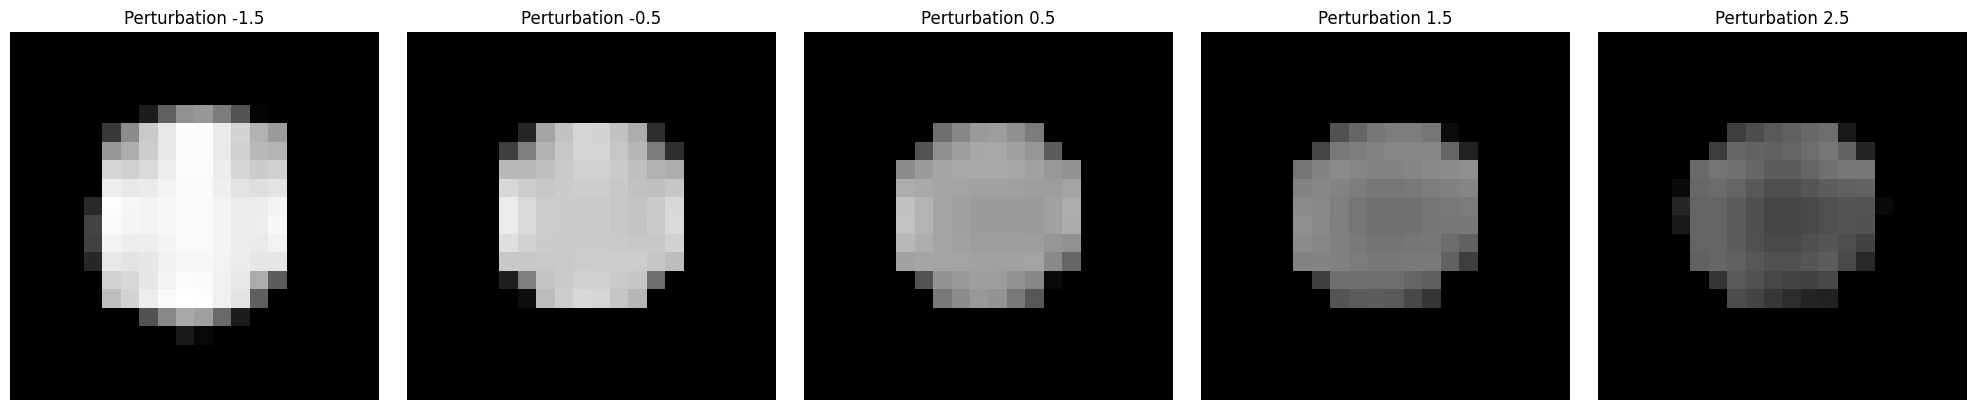

In [7]:
baseline_latent_vector = np.zeros((2, 2), dtype=np.float32)  # Start with a neutral latent vector

# Choose the feature to perturb (e.g., feature 0)
feature_index = 1

# Perturbation range
perturbations = np.linspace(-1.5, 2.5, 5) # feature index 1
#perturbations = np.linspace(-2.5, 1.5, 5) # feature index 0

# Store the perturbed reconstructions
perturbed_reconstructions = []

for value in perturbations:
    # Create a copy of the baseline latent vector
    perturbed_vector = baseline_latent_vector.copy()
    print(perturbed_vector.shape)
    # Modify the selected feature
    perturbed_vector[0, feature_index] = value
    
    # Decode the perturbed vector to generate a synthetic image
    synthetic_image = decoder.predict(perturbed_vector)  # Assuming 'decoder' is your trained decoder model
    
    # Store the result
    perturbed_reconstructions.append(synthetic_image[0])  # Assuming decoder outputs (batch_size, height, width, channels)

# Convert list to numpy array for easier handling
perturbed_reconstructions = np.array(perturbed_reconstructions)

# Plot the results
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
vmin = perturbed_reconstructions.min()
vmax = perturbed_reconstructions.max()

for i in range(5):
    im = axs[i].imshow(perturbed_reconstructions[i, :, :, 0], cmap='gray', vmin=0.25, vmax=vmax)
    axs[i].set_title(f'Perturbation {perturbations[i]}')
    axs[i].axis('off')
    #fig.colorbar(im, ax=axs[i])

plt.tight_layout()
#plt.savefig("perturbations_feat1.eps", format="eps", dpi=300, bbox_inches="tight")
plt.show()


# Feature Extraction

In [31]:
# Additional Feature Extraction Functions

# Function to compute granularity (texture measure)
def compute_granularity(image, threshold=0.1):
    """
    Compute granularity using local standard deviation as a texture measure.
    Higher values indicate more granular/textured regions.
    """
    from scipy import ndimage
    
    # Apply threshold to focus on cell region
    cell_region = image > threshold
    if np.sum(cell_region) == 0:
        return 0.0
    
    # Compute local standard deviation using a 3x3 kernel
    local_mean = ndimage.uniform_filter(image.astype(float), size=3)
    local_sqr_mean = ndimage.uniform_filter(image.astype(float)**2, size=3)
    local_var = local_sqr_mean - local_mean**2
    local_std = np.sqrt(np.maximum(local_var, 0))
    
    # Average standard deviation in cell region (granularity measure)
    granularity = np.mean(local_std[cell_region])
    return granularity


# Function to compute compactness (shape regularity)
def compute_compactness(image, threshold=0.1):
    """
    Compute compactness as perimeter^2 / (4*pi*area).
    Values close to 1 indicate circular shapes, higher values indicate irregular shapes.
    """
    binary = (image > threshold).astype(np.uint8)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return 1.0  # Default to circular
    
    cnt = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    
    if area <= 0:
        return 1.0
    
    compactness = (perimeter**2) / (4 * np.pi * area + 1e-6)
    return compactness

# Function to compute eccentricity (elongation measure)
def compute_eccentricity(image, threshold=0.1):
    """
    Compute eccentricity of the cell shape using ellipse fitting.
    Values close to 0 indicate circular shapes, close to 1 indicate elongated shapes.
    """
    binary = (image > threshold).astype(np.uint8)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return 0.0
    
    cnt = max(contours, key=cv2.contourArea)
    if len(cnt) < 5:  # Need at least 5 points to fit ellipse
        return 0.0
    
    try:
        ellipse = cv2.fitEllipse(cnt)
        a, b = ellipse[1][0]/2, ellipse[1][1]/1  # Semi-major and semi-minor axes
        if a <= 0 or b <= 0:
            return 0.0
        
        # Ensure a >= b for eccentricity calculation
        if b > a:
            a, b = b, a
        
        eccentricity = np.sqrt(1 - (b**2)/(a**2))
        return eccentricity
    except:
        return 0.0

# Function to compute perimeter
def compute_perimeter(image, threshold=0.1):
    """
    Compute cell perimeter using contour detection.
    """
    binary = (image > threshold).astype(np.uint8)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return 0.0
    
    cnt = max(contours, key=cv2.contourArea)
    perimeter = cv2.arcLength(cnt, True)
    
    return perimeter


In [32]:
# Enhanced Feature Perturbation Analysis (4 Features)

# Initialize arrays to store feature effects for 4 features
granularities_0, granularities_1 = [], []
compactness_0, compactness_1 = [], []
eccentricity_0, eccentricity_1 = [], []
perimeters_0, perimeters_1 = [], []

# Perturbation values
perturbations = np.linspace(-1.5, 2, 5)

# Iterate over both latent features
for feature_index in [0, 1]:
    for value in perturbations:
        # Create perturbed latent vector
        perturbed_vector = np.zeros((2, 2), dtype=np.float32)
        perturbed_vector[0, feature_index] = value

        # Decode the perturbed vector to generate a synthetic image
        synthetic_image = decoder.predict(perturbed_vector)[0, :, :, 0]

        # Compute selected features
        granularity = compute_granularity(synthetic_image)
        compactness = compute_compactness(synthetic_image)
        eccentricity = compute_eccentricity(synthetic_image)
        perimeter = compute_perimeter(synthetic_image)

        # Store results based on the feature being perturbed
        if feature_index == 0:
            granularities_0.append(granularity)
            compactness_0.append(compactness)
            eccentricity_0.append(eccentricity)
            perimeters_0.append(perimeter)
        else:
            granularities_1.append(granularity)
            compactness_1.append(compactness)
            eccentricity_1.append(eccentricity)
            perimeters_1.append(perimeter)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


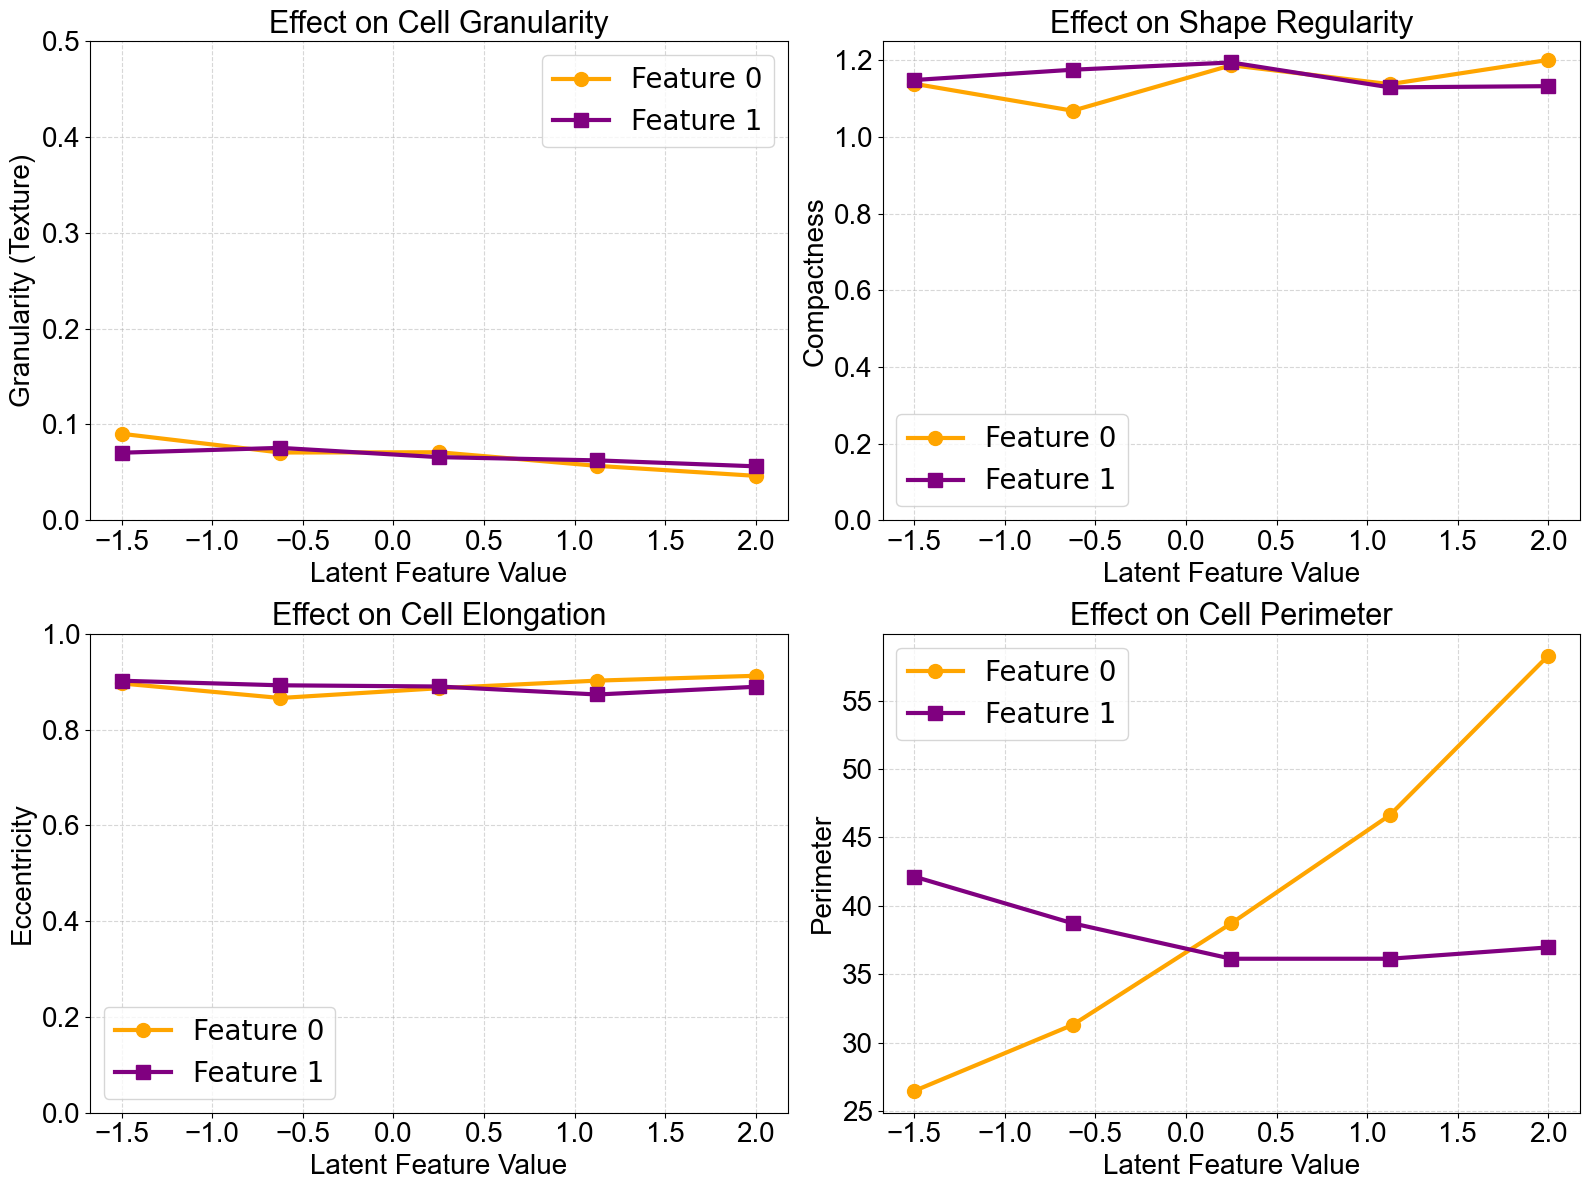

Enhanced feature perturbation analysis completed!
Features analyzed:
1. Granularity (texture measure) - should be relatively constant
2. Compactness (shape regularity) - measures deviation from circular shape
3. Eccentricity (elongation) - measures how elongated the cell is
4. Perimeter - measures cell boundary length
Features analyzed:
1. Granularity (texture measure) - should be relatively constant
3. Shape compactness (regularity)
4. Eccentricity (elongation)


In [ ]:
# Enhanced Feature Effects Visualization (4 Features)

# Define colors
color_0 = "orange"
color_1 = "purple"

# Create subplots for 4 features in 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Granularity (Texture)
axs[0, 0].plot(perturbations, granularities_0, marker='o', color=color_0, markersize=10, linewidth=3, label="Feature 0")
axs[0, 0].plot(perturbations, granularities_1, marker='s', color=color_1, markersize=10, linewidth=3, label="Feature 1")
axs[0, 0].set_xlabel("Latent Feature Value", fontsize=20, fontname="Arial")
axs[0, 0].set_ylabel("Granularity (Texture)", fontsize=20, fontname="Arial")
axs[0, 0].set_ylim(0, 0.5)
axs[0, 0].set_title("Effect on Cell Granularity", fontsize=22, fontname="Arial")
axs[0, 0].legend(fontsize=20)
axs[0, 0].grid(True, linestyle="--", alpha=0.5)
axs[0, 0].tick_params(axis='both', which='major', labelsize=20)
for label in axs[0, 0].get_xticklabels() + axs[0, 0].get_yticklabels():
    label.set_fontname('Arial')

# Plot 2: Compactness (Shape Regularity)
axs[0, 1].plot(perturbations, compactness_0, marker='o', color=color_0, markersize=10, linewidth=3, label="Feature 0")
axs[0, 1].plot(perturbations, compactness_1, marker='s', color=color_1, markersize=10, linewidth=3, label="Feature 1")
axs[0, 1].set_xlabel("Latent Feature Value", fontsize=20, fontname="Arial")
axs[0, 1].set_ylabel("Compactness", fontsize=20, fontname="Arial")
axs[0, 1].set_ylim(0, 1.25)
axs[0, 1].set_title("Effect on Shape Regularity", fontsize=22, fontname="Arial")
axs[0, 1].legend(fontsize=20)
axs[0, 1].grid(True, linestyle="--", alpha=0.5)
axs[0, 1].tick_params(axis='both', which='major', labelsize=20)
for label in axs[0, 1].get_xticklabels() + axs[0, 1].get_yticklabels():
    label.set_fontname('Arial')

# Plot 3: Eccentricity (Elongation)
axs[1, 0].plot(perturbations, eccentricity_0, marker='o', color=color_0, markersize=10, linewidth=3, label="Feature 0")
axs[1, 0].plot(perturbations, eccentricity_1, marker='s', color=color_1, markersize=10, linewidth=3, label="Feature 1")
axs[1, 0].set_xlabel("Latent Feature Value", fontsize=20, fontname="Arial")
axs[1, 0].set_ylabel("Eccentricity", fontsize=20, fontname="Arial")
axs[1, 0].set_ylim(0, 1)
axs[1, 0].set_title("Effect on Cell Elongation", fontsize=22, fontname="Arial")
axs[1, 0].legend(fontsize=20)
axs[1, 0].grid(True, linestyle="--", alpha=0.5)
axs[1, 0].tick_params(axis='both', which='major', labelsize=20)
for label in axs[1, 0].get_xticklabels() + axs[1, 0].get_yticklabels():
    label.set_fontname('Arial')

# Plot 4: Perimeter
axs[1, 1].plot(perturbations, perimeters_0, marker='o', color=color_0, markersize=10, linewidth=3, label="Feature 0")
axs[1, 1].plot(perturbations, perimeters_1, marker='s', color=color_1, markersize=10, linewidth=3, label="Feature 1")
axs[1, 1].set_xlabel("Latent Feature Value", fontsize=20, fontname="Arial")
axs[1, 1].set_ylabel("Perimeter", fontsize=20, fontname="Arial")
axs[1, 1].set_title("Effect on Cell Perimeter", fontsize=22, fontname="Arial")
axs[1, 1].legend(fontsize=20)
axs[1, 1].grid(True, linestyle="--", alpha=0.5)
axs[1, 1].tick_params(axis='both', which='major', labelsize=20)
for label in axs[1, 1].get_xticklabels() + axs[1, 1].get_yticklabels():
    label.set_fontname('Arial')

# Adjust layout and save as high-quality images
plt.tight_layout()
#plt.savefig("SI_enhanced_feature_effects.eps", format="eps", bbox_inches="tight")
#plt.savefig("enhanced_feature_effects.png", dpi=300, bbox_inches="tight")

plt.show()

print("Enhanced feature perturbation analysis completed!")
print("Features analyzed:")
print("1. Granularity (texture measure) - should be relatively constant")
print("2. Compactness (shape regularity) - measures deviation from circular shape")
print("3. Eccentricity (elongation) - measures how elongated the cell is")
print("4. Perimeter - measures cell boundary length")
print("Features analyzed:")
print("1. Granularity (texture measure) - should be relatively constant")
print("3. Shape compactness (regularity)")
print("4. Eccentricity (elongation)")


In [ ]:
# Function to compute cell area
def compute_area(image, threshold=0.1):
    return np.sum(image > threshold)

# Function to compute intensity at the center of the image
def compute_intensity(image):
    return image[image.shape[0]//2][image.shape[0]//2]

# Function to compute shape descriptors (aspect ratio, circularity)
def compute_shape_features(image, threshold=0.1):
    binary = (image > threshold).astype(np.uint8)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        return 0, 0  
    
    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = w / h
    
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    circularity = 4 * np.pi * (area / (perimeter ** 2 + 1e-6))  # Avoid division by zero
    
    return aspect_ratio, circularity

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


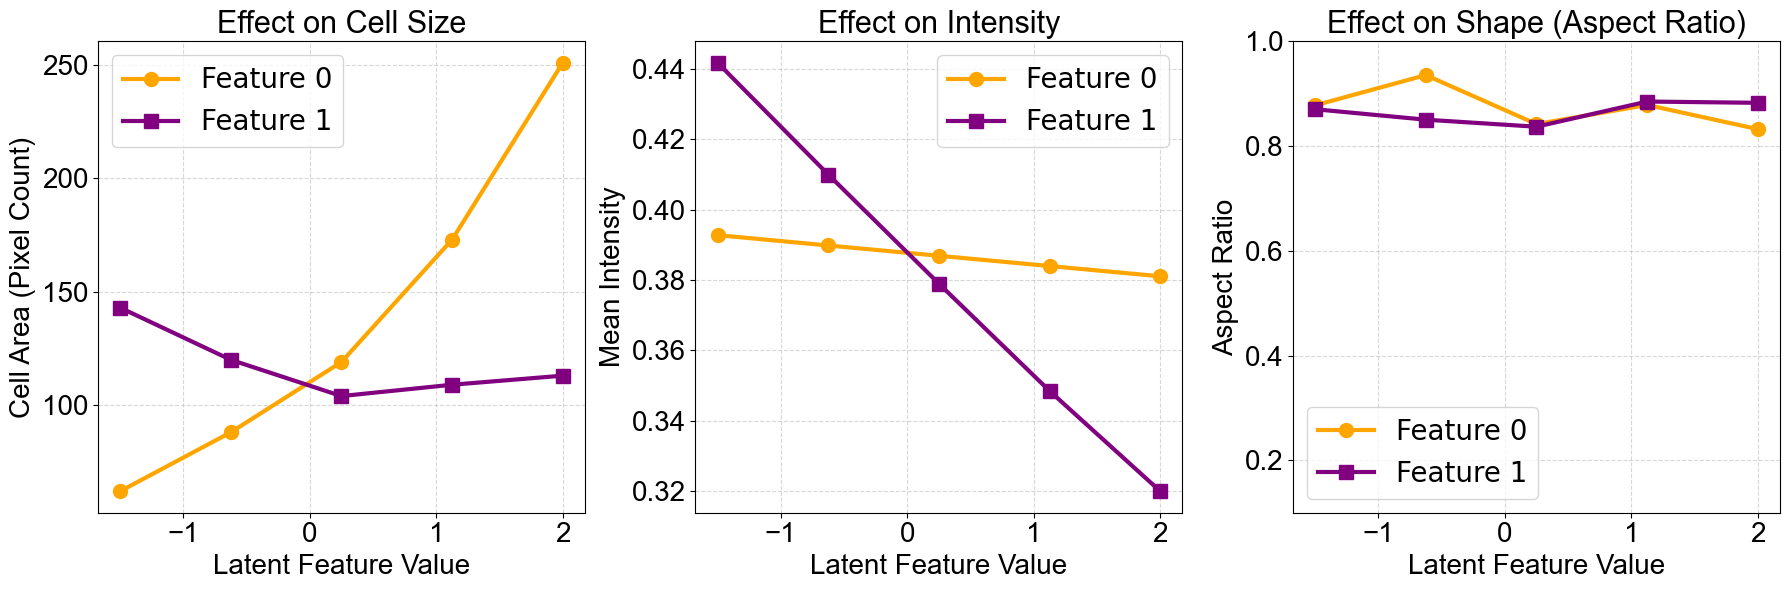

In [ ]:
# Initialize arrays to store feature effects
areas_0, areas_1 = [], []
intensities_0, intensities_1 = [], []
aspect_ratios_0, aspect_ratios_1 = [], []
circularities_0, circularities_1 = [], []

# Perturbation values
perturbations = np.linspace(-1.5, 2, 5)

# Iterate over both latent features
for feature_index in [0, 1]:
    for value in perturbations:
        # Create perturbed latent vector
        perturbed_vector = np.zeros((2, 2), dtype=np.float32)
        perturbed_vector[0, feature_index] = value

        # Decode the perturbed vector to generate a synthetic image
        synthetic_image = decoder.predict(perturbed_vector)[0, :, :, 0]

        # Compute features
        area = compute_area(synthetic_image)
        intensity = compute_intensity(synthetic_image)
        aspect_ratio, circularity = compute_shape_features(synthetic_image)

        # Store results based on the feature being perturbed
        if feature_index == 0:
            areas_0.append(area)
            intensities_0.append(intensity)
            aspect_ratios_0.append(aspect_ratio)
            circularities_0.append(circularity)
        else:
            areas_1.append(area)
            intensities_1.append(intensity)
            aspect_ratios_1.append(aspect_ratio)
            circularities_1.append(circularity)

# Define colors
# color_0 = "#E69F00"  # Orange
# color_1 = "#009E73"  # Teal
color_0 = "orange"
color_1 = "purple"

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Cell Area
axs[0].plot(perturbations, areas_0, marker='o', color=color_0, markersize=10, linewidth=3, label="Feature 0")
axs[0].plot(perturbations, areas_1, marker='s', color=color_1, markersize=10, linewidth=3, label="Feature 1")
axs[0].set_xlabel("Latent Feature Value", fontsize=20, fontname="Arial")
axs[0].set_ylabel("Cell Area (Pixel Count)", fontsize=20, fontname="Arial")
axs[0].set_title("Effect on Cell Size", fontsize=22, fontname="Arial")
axs[0].legend(fontsize=20)
axs[0].grid(True, linestyle="--", alpha=0.5)
axs[0].tick_params(axis='both', which='major', labelsize=20)  # Make tick labels much bigger
for label in axs[0].get_xticklabels() + axs[0].get_yticklabels():
    label.set_fontname('Arial')

# Plot Mean Intensity
axs[1].plot(perturbations, intensities_0, marker='o', color=color_0, markersize=10, linewidth=3, label="Feature 0")
axs[1].plot(perturbations, intensities_1, marker='s', color=color_1, markersize=10, linewidth=3, label="Feature 1")
axs[1].set_xlabel("Latent Feature Value", fontsize=20, fontname="Arial")
axs[1].set_ylabel("Mean Intensity", fontsize=20, fontname="Arial")
axs[1].set_title("Effect on Intensity", fontsize=22, fontname="Arial")
axs[1].legend(fontsize=20)
axs[1].grid(True, linestyle="--", alpha=0.5)
axs[1].tick_params(axis='both', which='major', labelsize=20)  # Make tick labels much bigger
for label in axs[1].get_xticklabels() + axs[1].get_yticklabels():
    label.set_fontname('Arial')

# Plot Shape Descriptors (Aspect Ratio)
axs[2].plot(perturbations, circularities_0, marker='o', color=color_0, markersize=10, linewidth=3, label="Feature 0")
axs[2].plot(perturbations, circularities_1, marker='s', color=color_1, markersize=10, linewidth=3, label="Feature 1")
axs[2].set_xlabel("Latent Feature Value", fontsize=20, fontname="Arial")
axs[2].set_ylabel("Aspect Ratio", fontsize=20, fontname="Arial")
axs[2].set_title("Effect on Shape (Aspect Ratio)", fontsize=22, fontname="Arial")
axs[2].set_ylim(0.1, 1.0)
axs[2].legend(fontsize=20)
axs[2].grid(True, linestyle="--", alpha=0.5)
axs[2].tick_params(axis='both', which='major', labelsize=20)  # Make tick labels much bigger
for label in axs[2].get_xticklabels() + axs[2].get_yticklabels():
    label.set_fontname('Arial')

# Adjust layout and save as high-quality images
plt.tight_layout()
#plt.savefig("feature_effects.eps", format="eps", bbox_inches="tight")

plt.show()